<a href="https://colab.research.google.com/github/AshleyHeinrich/Sales-Predictions/blob/main/Sales_Predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions

Ashley Heinrich

* Exploring and Cleaning the Data. 
* Identifying missing values, duplicate columns 
* Amending categorical inconsistencies. 
* Exploratory and Explanatory Visuals 

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive' )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQi7iKxT7clZBqORghprLraGVOXXfp2A0Y2Z1gHE2BWOoOYeKvsOWNjHyZYE-fJ_45COs2lYKQVZSxJ/pub?output=csv')
sales_df = pd.read_csv(filename)
sales_df

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data Cleaning


**Explore Data**

In [ ]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. There are 12 columns and 8523 rows 
2. The datatypes are objects, integers and floats
3. Data types appropriate for the information in each column. **bold text**

In [ ]:
sales_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

1. Examine the number of unique values in columns
2. Item_Identifier, Item_Visibility, Item_MRP, and Item_Outlet_Sales have many unique values
3. Fat_Content, Item_Type, _Outlet_Identifier, Establishment Year, Size and Type have fewer

**Check for Duplicates**

In [ ]:
sales_df.duplicated().sum()

0

No duplicates present

**Inspecting Categorical Columns and Addressing Inconsistencies**

In [ ]:
sales_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

* Examining object type columns and verifying correct data type.  
* Looking for inconsistent categories of data
* Appropriate 


##Standardizing for Consistency

In [ ]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
fat_content_map = {'LF': 'Low Fat',
                   'low fat': 'Low Fat',
                   'reg': 'Regular',
                   'Low Fat': 'Low Fat',
                   'Regular': 'Regular'}

sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace (fat_content_map)
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
sales_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Change High to Large
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].replace('High', 'Large')
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [ ]:
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

##Missing Values

In [ ]:
# Identify Missing 
## Missing 1463 in Item_Weight
## Missing 2410 in Outlet_Size
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
sales_df[sales_df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**Addressing Missing Values**

1. Taking the mean weight for missing values in Item_Weight column
2. Filling in with 'Missing' for the missing values in Outlet_Size column. 

In [ ]:
mean_weight = sales_df['Item_Weight'].mean()
mean_weight


12.857645184135976

In [ ]:
sales_df['Item_Weight'].fillna(mean_weight, inplace=True)


In [ ]:
sales_df['Outlet_Size'].fillna('Missing', inplace=True)


In [ ]:
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

* All missing values have been addressed. 

##Summary Statistics For Numerical Columns

In [ ]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

In [ ]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Outlet Sales Distribution Visualizatio**n 

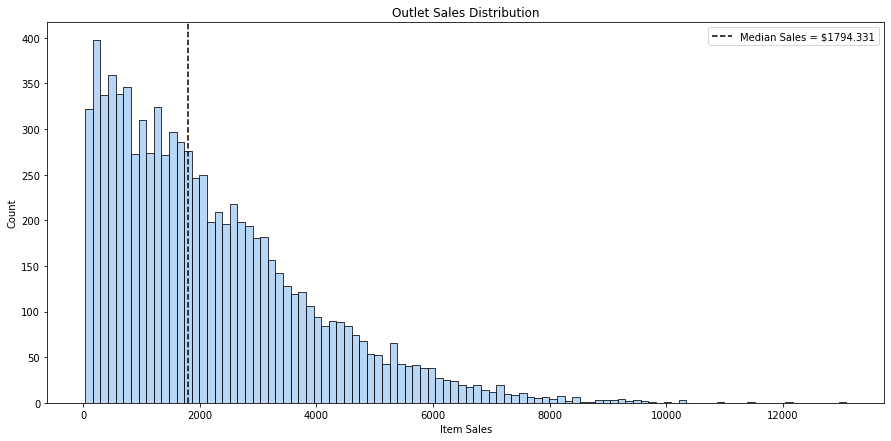

In [ ]:
sns.set_palette('pastel')

plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x = 'Item_Outlet_Sales', bins=100);


ax.set(title = 'Outlet Sales Distribution', xlabel = 'Item Sales')

median = sales_df['Item_Outlet_Sales'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Sales = ${median}')

ax.legend();


* Outlet Sales distribution is right skewed 
*  Most sales occur around median and below

In [ ]:
sales_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Item Visibility Distribution Visualization**

In [ ]:
sales_df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

**Item Visibility Distribution**

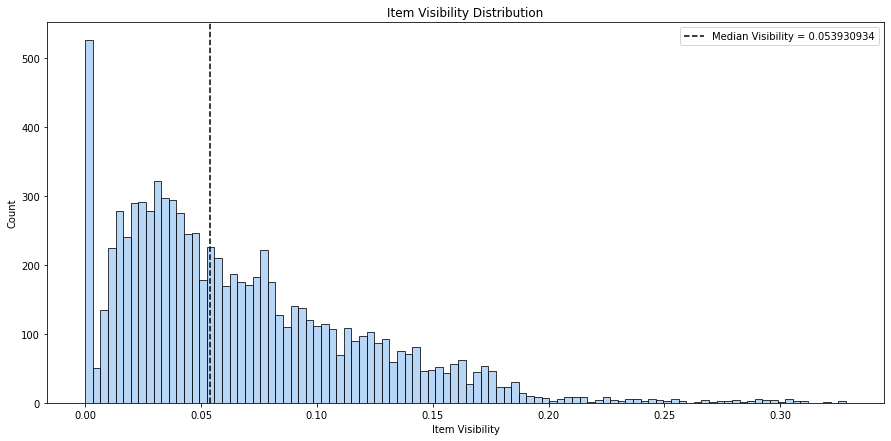

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x ='Item_Visibility', bins = 100);

ax.set(title = 'Item Visibility Distribution', xlabel = 'Item Visibility')

median = sales_df['Item_Visibility'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Visibility = {median}')

ax.legend();


* Item_Visibility distribution is also right skewed
* Most have zero visibility

In [ ]:
sales_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

**Item Weight Distribution**

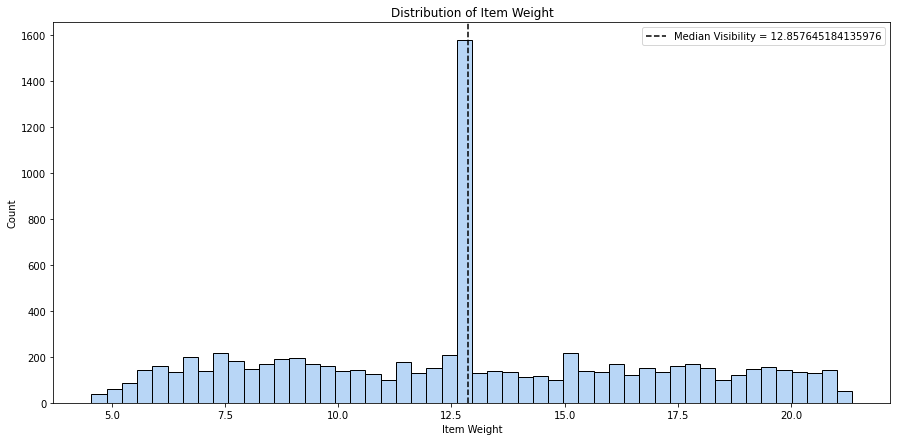

In [ ]:

plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x ='Item_Weight', bins = 50);

ax.set(title = 'Distribution of Item Weight', xlabel = 'Item Weight')

median = sales_df['Item_Weight'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Visibility = {median}')

ax.legend();


* Largest amount of items fall around the median weight due to filling in missing values

**Item Sales Boxplot Visualization**

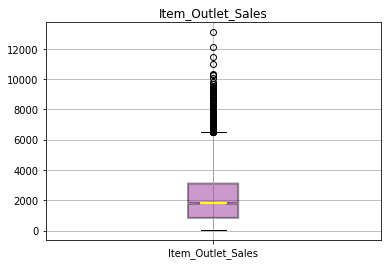

In [ ]:
sales_df.boxplot(column = ['Item_Outlet_Sales'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
           
plt.title('Item_Outlet_Sales');


* There are many sales outliers present above maximum 

**Item Visibility Boxplot Visualization**



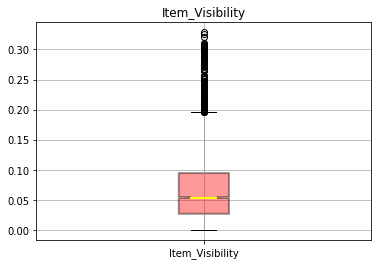

In [ ]:
sales_df.boxplot(column = ['Item_Visibility'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4));
           
plt.title('Item_Visibility');


* Many visibility outliers present above maxiumum

**Item Weight Boxplot Distribution**

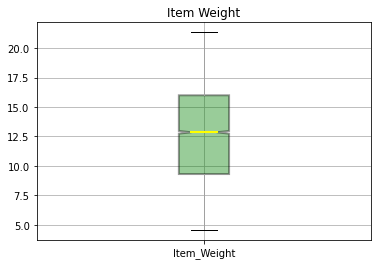

In [ ]:
sales_df.boxplot(column = ['Item_Weight'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
           
plt.title('Item Weight');


* No outliers present for item weight

In [ ]:
sales_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

**Correlation of Data using Heatmap**

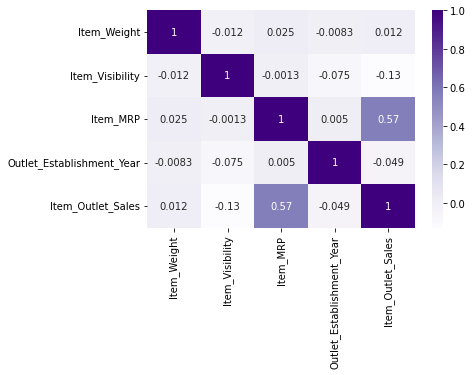

In [ ]:
corr = sales_df.corr()
sns.heatmap(corr, cmap = 'Purples', annot= True);

# From Learn Platform 

* There is a moderate correlation between Item_MRP and Item_Outlet Sales
* This is to be expected as item price correlates to total sales
* There are no other significant correlations present in the dataset

**Fat Content Visualization**

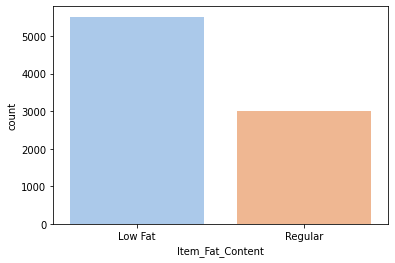

In [ ]:
sns.countplot(data=sales_df, x='Item_Fat_Content');

*More low fat items than regular in data set

**Fat Content and Outlet Sales Visualization**

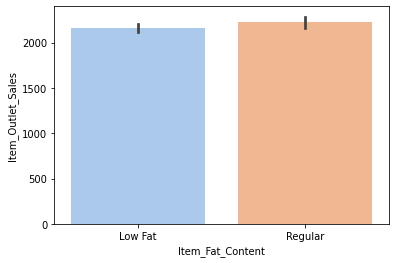

In [ ]:
sns.barplot(data=sales_df, x='Item_Fat_Content', y='Item_Outlet_Sales');

 * More regular items are sold but the sales are close





**Compare Item_Type to Outlet_Sales**

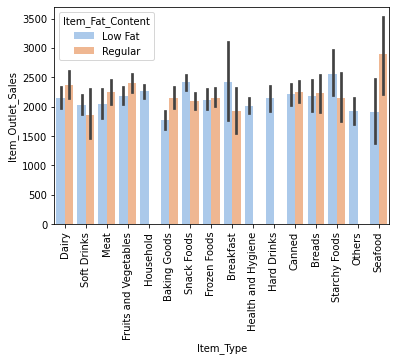

In [ ]:
sns.barplot(data=sales_df, x='Item_Type', y='Item_Outlet_Sales', hue ='Item_Fat_Content');
plt.xticks(rotation='vertical');

* Shows how each item is selling
* Regular seafood selling more than low fat seafood
* Low fat starchy foods are selling more than regular fat
* Low fat breakfast foods are selling more than regular fat
* Low fat snack foods are selling more than regular fat
* Regular fat baking goods are selling more than low fat
* Regular fat dairy is selling more than low fat dairy

**Comparing Item_Type to Item_MRP**

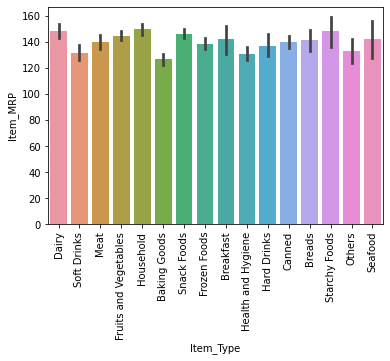

In [ ]:
sns.barplot(data=sales_df, x='Item_Type', y='Item_MRP');
plt.xticks(rotation='vertical');

* Item type and its sales price
* Highest priced items are dairy, household goods, starchy foods
* Lowest priced are baking goods

** Comparing Outlet_Size to Item_Outlet_Sales

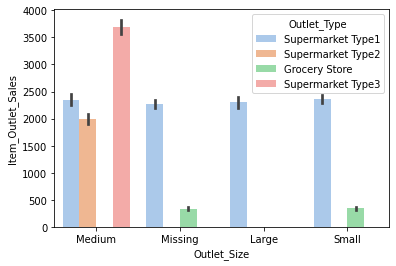

In [ ]:
sns.barplot(data=sales_df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type');


* Pending data marked as missing, medium sized stores have the highest sales
* Supermarket type 3 has the highest sales in the medium category
* Large size only has Supermarket type 1's
* Supermarket type 1 has the highest sales in the small size category

**Outlet_Size Comparison**

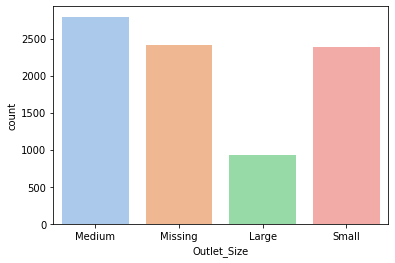

In [ ]:
sns.countplot(data=sales_df, x='Outlet_Size');

* Pending data marked missing, medium outlet stores are the most popular size
followed by small 

## Explanatory Visuals

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## What are the highest and lowest selling items? 

In [ ]:
# What foods sell the least/most
means = sales_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-46-60a848cf9a84>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


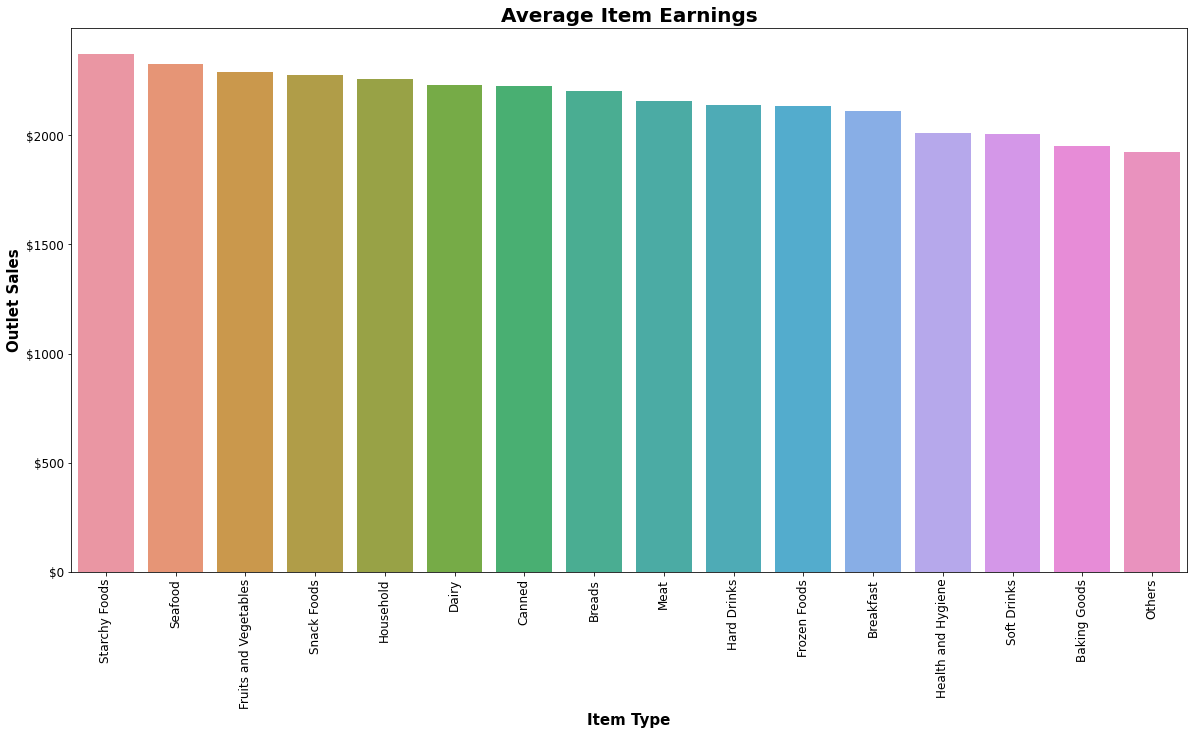

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index,
                 ci = None);


plt.xticks(rotation = 'vertical', fontsize = 12)
plt.yticks(fontsize = 12);
ax.set_title('Average Item Earnings', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 15, fontweight = 'bold');


ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);



# Help from Exemplar student project
#https://keithwithdata.medium.com/this-week-i-learnt-how-to-add-to-ticks-on-matplotlib-graphs-f67ccee1f3dc

The highest selling items are starchy foods and the lowest is the Others category.

**Recommendation:** Focusing on more diversity in higher selling categories or better product placement/marketing of lower selling items to increase sales. 

## Which outlet type has the highest sales? 

In [ ]:
means_2 = sales_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
means_2

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-48-28087ac7af1d>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


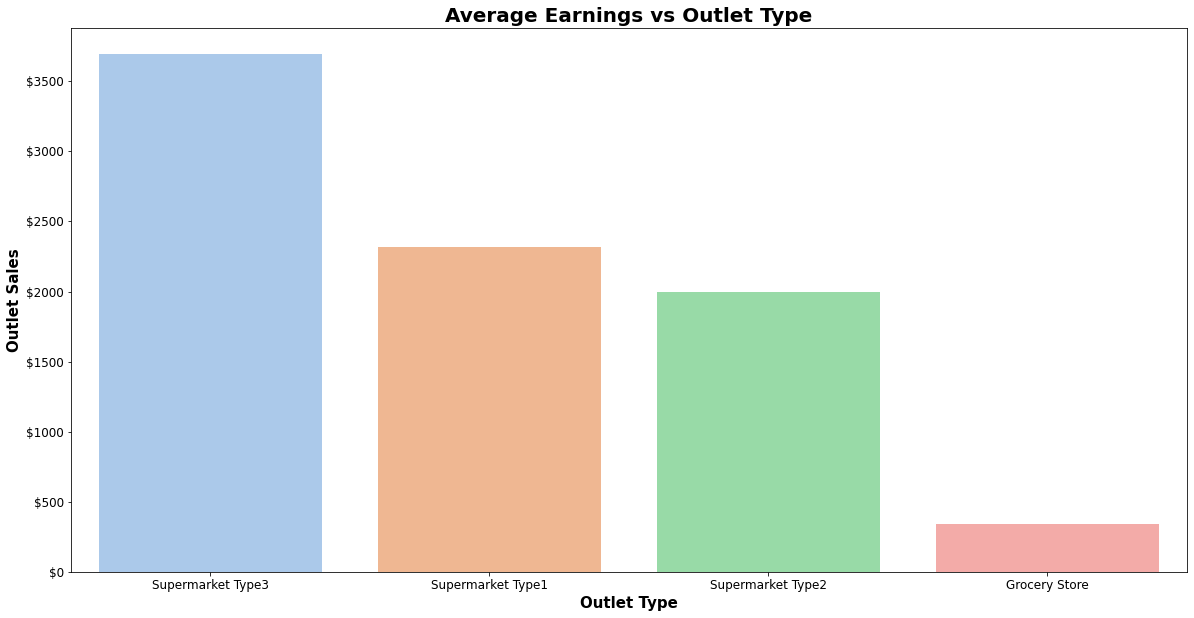

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_df,x='Outlet_Type', y = 'Item_Outlet_Sales' , order = means_2.index, 
                 ci = None)


ax.set_title('Average Earnings vs Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold');
ax.set_ylabel('Outlet Sales', fontsize = 15, fontweight = 'bold');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);

Supermarket Type 3 have the highest sales while Grocery Stores have the lowest sales. 

**Recommendation:** Focus on acquiring more Type 3 Supermarkets for product placement as they sell better. 

##Which outlet type has the most stores?

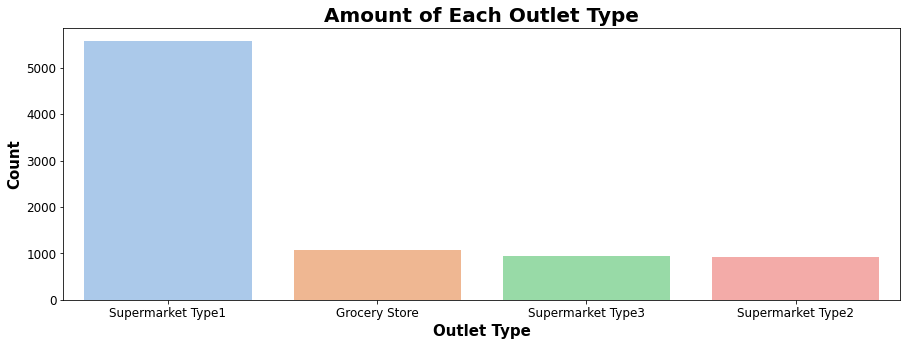

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.countplot(data=sales_df, x='Outlet_Type', order = sales_df['Outlet_Type'].value_counts(ascending = False).index);


ax.set_title('Amount of Each Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 15, fontweight = 'bold');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

# https://www.statology.org/seaborn-countplot-order/

There are more of Type 1 Supermarkets and Grocery Stores, yet Type 3 has significantly higher earnings. 

**Recommendation:** Look further into Type 3 Supermarkets and how they are acheiving higher sales including sales strategies, location, product placement, etc. These properties may be applied to other outlets, like Type 1 Supermarkets or business can be pivoted towards Type 3 Supermarkets.

## What items/characteristics are popular in Supermarket Type 3 stores? 

In [ ]:
outlet_filter = sales_df['Outlet_Type'] == 'Supermarket Type3'
outlet_filter

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Type, Length: 8523, dtype: bool

In [ ]:
means3 = sales_df.loc[outlet_filter,:].groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
means3

Item_Type
Breakfast                4584.759327
Fruits and Vegetables    4114.487061
Dairy                    3915.182245
Meat                     3862.293911
Household                3821.207782
Canned                   3779.866814
Snack Foods              3745.168739
Breads                   3565.122748
Frozen Foods             3553.621470
Starchy Foods            3512.190114
Hard Drinks              3432.951643
Health and Hygiene       3318.069783
Soft Drinks              3284.938836
Baking Goods             3248.872417
Others                   2700.928667
Seafood                  2687.073686
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-52-0d15e1c7e0fe>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


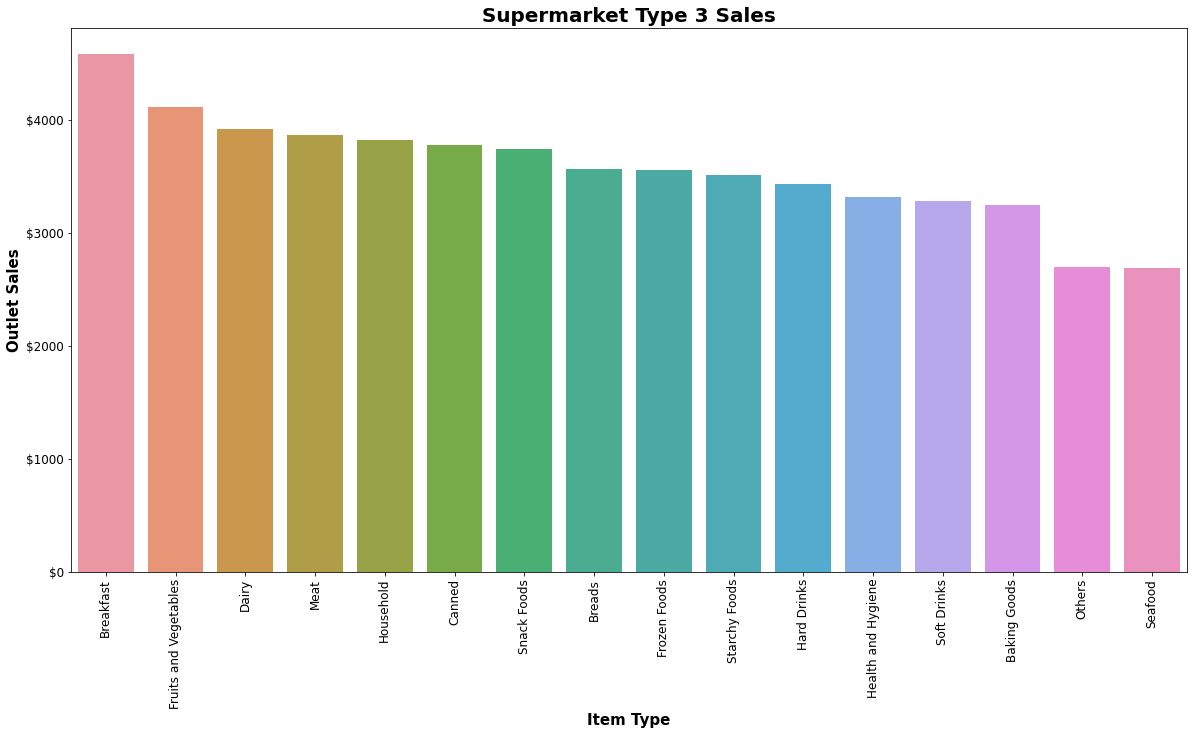

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_df.loc[outlet_filter,:],x='Item_Type', y = 'Item_Outlet_Sales', order = means3.index,
                 ci = None);


plt.xticks(rotation = 'vertical', fontsize = 12)
plt.yticks(fontsize = 12)

ax.set_title('Supermarket Type 3 Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 15, fontweight = 'bold');


ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);

Breakfast foods are the highest earners, followed by Fruits and Vegetables. The lowest earning products are Seafood and the Others category. 

Effects of fat content on sales can be found below. 

<ipython-input-53-646e0e7a4df0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


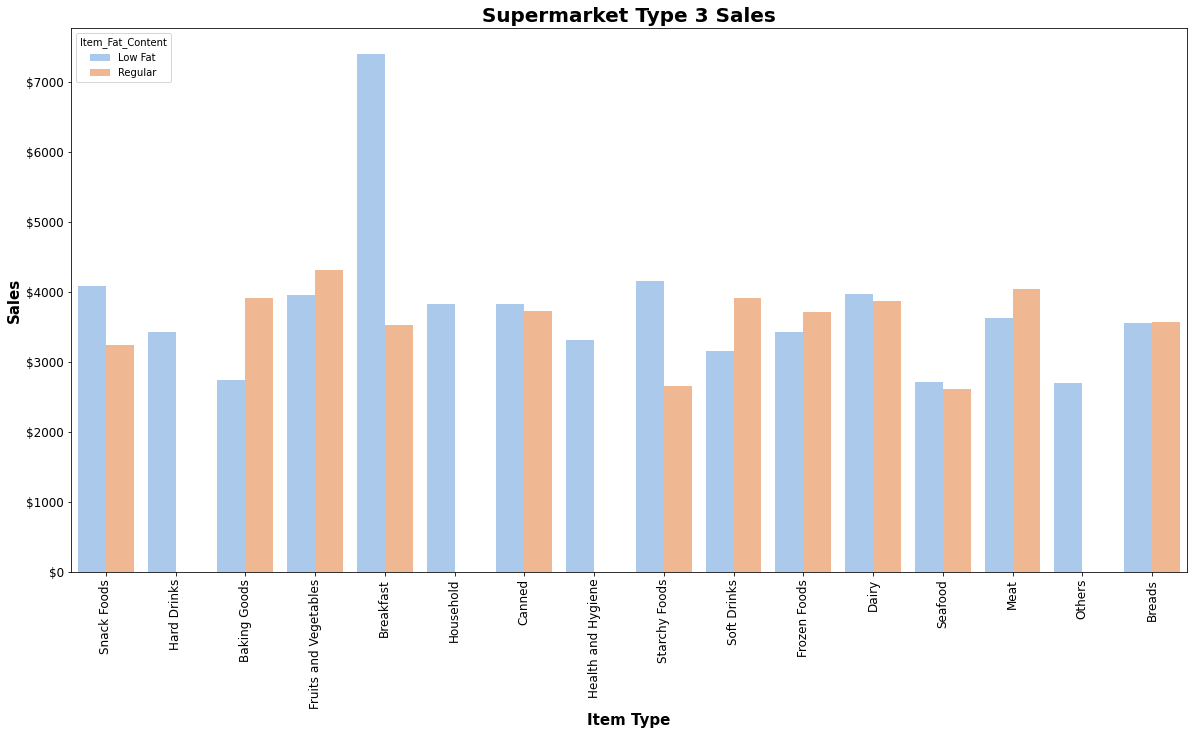

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data = sales_df.loc[outlet_filter, :], x = 'Item_Type', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content',
                 ci = None)

plt.xticks(rotation = 'vertical', fontsize = 12)
plt.yticks(fontsize = 12)

ax.set_title('Supermarket Type 3 Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Sales', fontsize = 15, fontweight = 'bold');


ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);



The highest sold items are low fat breakfast products. 
The lowest sold is regular seafood. 

Major differences in sales include Low fat starchy foods and snack foods outselling regular fat options. Meanwhile, Regular fat options for baking goods and fruits and vegetables outsell the lower fat counterparts. 

In [ ]:
outlet3_sales = sales_df.loc[outlet_filter,:].groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].mean().sort_values(ascending = False)
outlet3_sales

Item_Type              Item_Fat_Content
Breakfast              Low Fat             7405.915333
Fruits and Vegetables  Regular             4308.839134
Starchy Foods          Low Fat             4155.590700
Snack Foods            Low Fat             4080.809993
Meat                   Regular             4046.732400
Dairy                  Low Fat             3968.563319
Fruits and Vegetables  Low Fat             3950.822158
Baking Goods           Regular             3912.063253
Soft Drinks            Regular             3907.580200
Dairy                  Regular             3866.376691
Canned                 Low Fat             3829.377234
Household              Low Fat             3821.207782
Canned                 Regular             3733.032632
Frozen Foods           Regular             3706.541890
Meat                   Low Fat             3633.590184
Breads                 Regular             3568.497771
                       Low Fat             3562.343318
Breakfast              Re

<ipython-input-55-efc9c440bb95>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


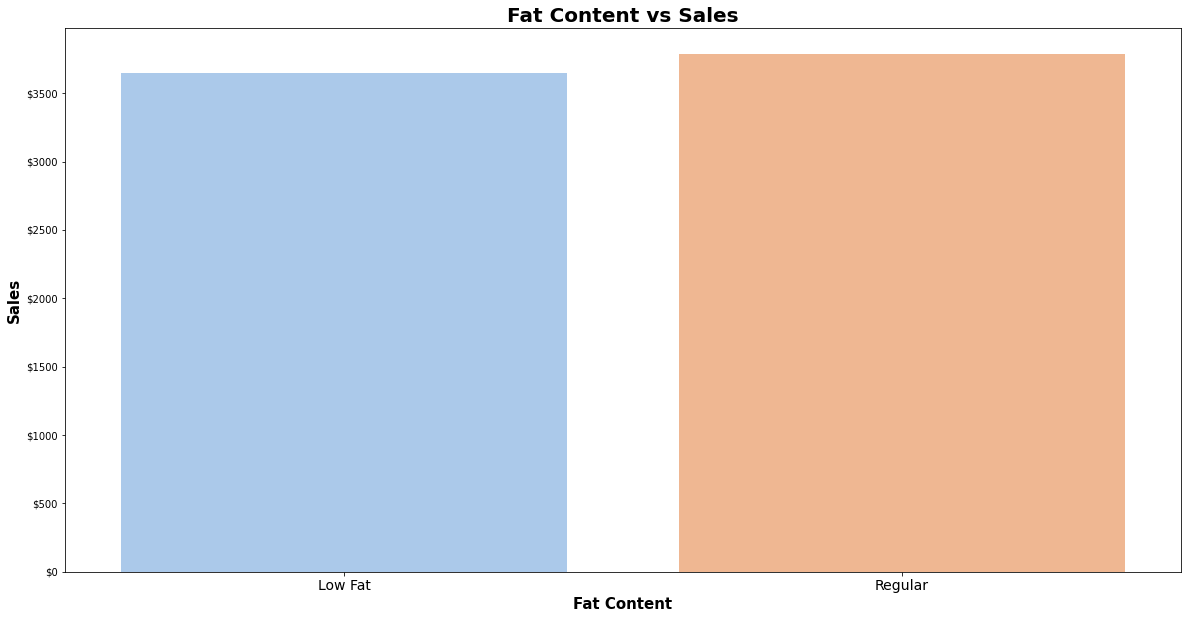

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data = sales_df.loc[outlet_filter, :], x = 'Item_Fat_Content', y = 'Item_Outlet_Sales',
                 ci = None)


ax.set_title('Fat Content vs Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Fat Content', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Sales', fontsize = 15, fontweight = 'bold');

plt.xticks(fontsize = 14)
ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);

The sales of Regular fat products is slightly higher for Type 3 markets but Low Fat products still have strong sales. 

**Final Recommendation:** Focus can be on increasing the sales of low fat products or higher overall selling products. Focus can alternatively be on finding out why the low earning products aren't as profitable in a Type 3 market.  

#Preprocessing for Machine Learning

## Import and Load Data

* Reloading Data to return to original dataset and prevent data leakage.
* Imputations will be done following split. 
* Preprocessing for Machine Learning
* Linear Regression
* Simple Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

filename = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTLYSy_MdMbfvaGcdR4O_seKnlr2-ufP5lNfBNHePTv2tfw_d-PRpLwnQLr5Re_DTMMkfiaQrQgECzv/pub?output=csv')
df = pd.read_csv(filename)

## Data Cleaning

**Explore Data**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Duplicates**

In [ ]:
# None present
df.duplicated().sum()

0

In [ ]:
# Dropping column
df = df.drop('Item_Identifier', axis = 'columns')

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Inspecting Categorical Columns and Addressing Inconsistencies**

In [ ]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64



- Column= Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Renaming for Consistency in Categorical Values
fat_content_map = {'LF': 'Low Fat',
                   'low fat': 'Low Fat',
                   'reg': 'Regular',
                   'Low Fat': 'Low Fat',
                   'Regular': 'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace (fat_content_map)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Change High to Large
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

##Exploring/Examining Missing Data

In [ ]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[df.isna().any(axis = 1)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...
8504,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Identify Column Features



In [ ]:
"""
Item_Weight:                numerical   float64
Item_Fat_Content:           ordinal     object   ** Can replace before split 
Item_Visibility:            numerical   float64
Item_Type:                  nominal     object
Item_MRP:                   numerical   float64
Outlet_Identifier:          nominal     object
Outlet_Establishment_Year:  numerical   int64
Outlet_Size:                ordinal **  object   ** many missing values
Outlet_Location_Type:       nominal     object   ** do not have enough information about each tier to determine ordinal
Outlet_Type:                nominal     object
Item_Outlet_Sales:          numerical   float 64

"""

'\nItem_Weight:                numerical   float64\nItem_Fat_Content:           ordinal     object   ** Can replace before split \nItem_Visibility:            numerical   float64\nItem_Type:                  nominal     object\nItem_MRP:                   numerical   float64\nOutlet_Identifier:          nominal     object\nOutlet_Establishment_Year:  numerical   int64\nOutlet_Size:                ordinal **  object   ** many missing values\nOutlet_Location_Type:       nominal     object   ** do not have enough information about each tier to determine ordinal\nOutlet_Type:                nominal     object\nItem_Outlet_Sales:          numerical   float 64\n\n'

**Ordinal Column**

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
replacement_dictionary = {'Low Fat':0, 'Regular':1}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

## Split Data

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'])
            
y = df['Item_Outlet_Sales']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Instantiate Column Selectors

In [ ]:
cat_cols = ['Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']

ord_cols = ['Outlet_Size'] 

num_selector = make_column_selector(dtype_include = 'number')


## Instantiate Transformers

In [ ]:
# Imputers

freq_imputer = SimpleImputer(strategy = 'most_frequent')

mean_imputer = SimpleImputer(strategy = 'mean')
 

# Scaler

scaler = StandardScaler()


# One Hot Encoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output =False)


# Ordinal Encoder
 

ord_cat = [['Small', 'Medium', 'Large']]

oe = OrdinalEncoder(categories= ord_cat)


## Instantiate Pipelines 

In [ ]:
# Numeric pipeline  

numeric_pipeline = make_pipeline(mean_imputer, scaler)

numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical Pipeline

categorical_pipeline = make_pipeline(freq_imputer, ohe)

categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Ordinal Pipeline

ordinal_pipeline = make_pipeline(freq_imputer, oe, scaler)

ordinal_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])),
                ('standardscaler', StandardScaler())])

## Instantiate Transformers

In [ ]:
# Making tuples for transformer

num_tuple = (numeric_pipeline, num_selector)

cat_tuple = (categorical_pipeline, cat_cols)

ord_tuple = (ordinal_pipeline, ord_cols)

# Column Transformer

preprocessor = make_column_transformer(num_tuple, cat_tuple, ord_tuple, remainder = 'passthrough') 
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cc1bc92b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

## Transform Data

In [ ]:
# Fit only on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cc1bc92b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [ ]:
# Transform both train and test

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Check Data

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed


0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 39)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  1.        ,
         0.        ,  0.28737371],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  1.        ,
         0.        ,  0.28737371],
       [-0.13151196,  1.35076614,  1.81331864, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  0.        ,
         0.        ,  0.28737371],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  0.        ,
         0.        , -1.38404828]])

##Linear Regression Model

**Function**

Metrics for X_train: 

mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))
mse = mean_squared_error(y_train, model_pipeline.predict(x_train))
rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))
r2 = r2_score(y_train, model_pipeline.predict(x_train))


Metrics for X_test: 

mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))
mse = mean_squared_error(y_test, model_pipeline.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))
r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [ ]:
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = mean_absolute_error(y_train, pipe.predict(x_train))
  mse = mean_squared_error(y_train, pipe.predict(x_train))
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = mean_absolute_error(y_test, pipe.predict(x_test))
  mse = mean_squared_error(y_test, pipe.predict(x_test))
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [ ]:
# Instance of model
lin_reg = LinearRegression()

# Model pipeline
linreg_pipe = make_pipeline(preprocessor, lin_reg)

# Fit the model

linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cc1bc92b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                                                 sparse_output=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('linearregression', LinearRegression())])

**Metrics**

In [ ]:
model_metrics(linreg_pipe, X_train, y_train, X_test, y_test, model_name = 'lin_reg')

lin_reg Train Scores
MAE: 847.1244 
MSE: 1,297,558.9012 
RMSE: 1,139.1044 
R2: 0.5616

lin_reg Test Scores
MAE: 804.1051 
MSE: 1,194,341.2062 
RMSE: 1,092.8592 
R2: 0.5671



**Results: **

R2 score is low, where the linear regression model can only account for 56% of the variation in y_test using the features in X_test. 
The RMSE is significantly higher than the MAE which means there is variance and large errors are present. MAE shows that model has an average error of aprroximately $804 between the predictions and the actuals in this data set. 

##Regression Tree Model

In [ ]:
# Create instance of Model
reg_tree = DecisionTreeRegressor(random_state =42)

# Model Pipeline

reg_tree_pipe = make_pipeline(preprocessor, reg_tree)

# Fit the model

reg_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cc1bc92b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**Metrics**

In [ ]:
# Initial Scores: Overfitting - will tune below
model_metrics(reg_tree_pipe, X_train, y_train, X_test, y_test, model_name = 'reg_tree')

reg_tree Train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

reg_tree Test Scores
MAE: 1,038.4565 
MSE: 2,202,503.0537 
RMSE: 1,484.0832 
R2: 0.2017



In [ ]:
max_depth = reg_tree.get_depth()

max_depth

5

In [ ]:
# Create a range of values from 1 to max_depth to evaluate
depths = range(1, max_depth)

## Create a dataframe to store Train and Test  R2 scores
scores = pd.DataFrame(columns=['Train Score', 'Test Score'], index=depths)

## Loop through the max_depth values
for depth in depths:
  ## Create an instance of the model
  reg_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  ## Create a model pipeline
  reg_tree_pipe = make_pipeline(preprocessor, reg_tree)
  ## Fit the model
  reg_tree_pipe.fit(X_train, y_train)

  ## Obtain the predictions from the model
  train_pred = reg_tree_pipe.predict(X_train)
  test_pred = reg_tree_pipe.predict(X_test)

  ## Obtain the R2 scores for Train and Test
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  ## Save the Train and Test R2 Score for this depth in the scores dataframe
  scores.loc[depth, 'Train Score'] = train_r2score
  scores.loc[depth, 'Test Score'] = test_r2score

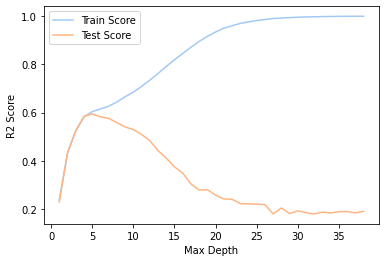

In [ ]:
##Visualize the max_depths to display which achieves the highest R2 score
plt.plot(depths, scores['Train Score'], label='Train Score')
plt.plot(depths, scores['Test Score'], label='Test Score')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [ ]:
## Create a version on the scores dataframe
## sorted by highest Test Scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
## Display the first (5) rows of the dataframe
sorted_scores.head()

,Train Score,Test Score
5,0.60394,0.59471
4,0.582625,0.584005
6,0.615161,0.582274
7,0.626843,0.576421
8,0.643832,0.558316


In [ ]:
## sort the dataframe by test scores and save the index (k) of the best score
best_depth = sorted_scores.index[0]
best_depth

5

In [ ]:
## Create an instance of the model
reg_tree = DecisionTreeRegressor(max_depth=best_depth, random_state = 42)
## Create a model pipeline
reg_tree_pipe = make_pipeline(preprocessor, reg_tree)
## Fit the model
reg_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cc1bc92b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                   'Outlet_Identifier',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [ ]:
model_metrics(reg_tree_pipe, X_train, y_train, X_test, y_test, model_name = 'tuned_reg_tree')

tuned_reg_tree Train Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

tuned_reg_tree Test Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



**Results:**

The regressiom tree model performed slightly better on the test data as compared to the linear regression model. 

 The R2 is still low and this model can only account for about 59% of the variation in y_test using the features in X_test. 

The RMSE is higher than the MAE and which also shows there is variance and the model is making some large errors. 

The MAE shows that the model has an average error of aprroximately $738 between the predictions and the actuals in this data set. This is an improvement over the linear regression model. Whether this is satisfactory or not is dependent upon how success is defined by the stakeholders and/or company. 